### How to Develop a Word-Based Neural Language Model

### Two-Words-In, One-Word-Out Sequence

In [39]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense

### Reading data

In [23]:
# load doc into memory

file = open('/home/hasan/DATA SET/word based data.txt', 'r')
# read all text
text = file.read()
# close the file
file.close()

### tokenizer

In [24]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
encoded = tokenizer.texts_to_sequences([text])[0]

In [25]:
encoded

[2,
 1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 2,
 14,
 15,
 1,
 16,
 17,
 18,
 1,
 3,
 19,
 20,
 21]

### vocabulary size

In [26]:
# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print( ' Vocabulary Size: %d ' % vocab_size)

 Vocabulary Size: 22 


### Encoding from 2 word to 1

In [27]:
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
    sequence = encoded[i-2:i+1]
    sequences.append(sequence)
    
print('Total Sequences: %d' % len(sequences))


 Total Sequences: 23 


In [28]:
sequences

[[2, 1, 3],
 [1, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [7, 8, 9],
 [8, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 13],
 [12, 13, 2],
 [13, 2, 14],
 [2, 14, 15],
 [14, 15, 1],
 [15, 1, 16],
 [1, 16, 17],
 [16, 17, 18],
 [17, 18, 1],
 [18, 1, 3],
 [1, 3, 19],
 [3, 19, 20],
 [19, 20, 21]]

### sequences

In [29]:
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)


Max Sequence Length: 3


### Spliting data

In [30]:
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)


### Model

In [31]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))


In [32]:
# summarize defined model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2, 10)             220       
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_2 (Dense)              (None, 22)                1122      
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________


In [33]:
# compile network
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

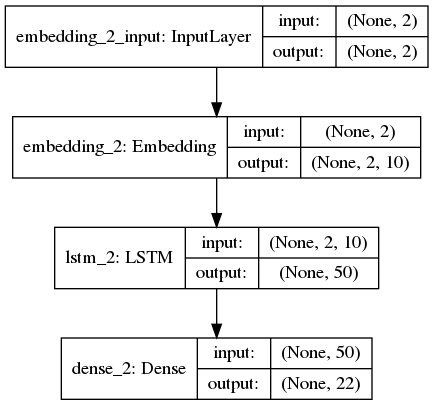

In [34]:
#plotting model
plot_model(model, to_file='model.png', show_shapes=True)

In [35]:
# fit network
model.fit(X, y, epochs=500, verbose=2)

/home/hasan/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
 - 0s - loss: 3.0904 - accuracy: 0.0870
Epoch 2/500
 - 0s - loss: 3.0895 - accuracy: 0.1304
Epoch 3/500
 - 0s - loss: 3.0885 - accuracy: 0.1304
Epoch 4/500
 - 0s - loss: 3.0876 - accuracy: 0.1304
Epoch 5/500
 - 0s - loss: 3.0866 - accuracy: 0.0870
Epoch 6/500
 - 0s - loss: 3.0856 - accuracy: 0.0870
Epoch 7/500
 - 0s - loss: 3.0846 - accuracy: 0.0870
Epoch 8/500
 - 0s - loss: 3.0836 - accuracy: 0.0870
Epoch 9/500
 - 0s - loss: 3.0826 - accuracy: 0.0870
Epoch 10/500
 - 0s - loss: 3.0816 - accuracy: 0.0870
Epoch 11/500
 - 0s - loss: 3.0806 - accuracy: 0.0870
Epoch 12/500
 - 0s - loss: 3.0795 - accuracy: 0.0870
Epoch 13/500
 - 0s - loss: 3.0784 - accuracy: 0.0870
Epoch 14/500
 - 0s - loss: 3.0773 - accuracy: 0.0870
Epoch 15/500
 - 0s - loss: 3.0761 - accuracy: 0.0870
Epoch 16/500
 - 0s - loss: 3.0750 - accuracy: 0.0870
Epoch 17/500
 - 0s - loss: 3.0737 - accuracy: 0.0870
Epoch 18/500
 - 0s - loss: 3.0725 - accuracy: 0.0870
Epoch 19/500
 - 0s - loss: 3.0712 - accuracy: 0.0870
Ep

### Predicting with new data

In [36]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding= 'pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text


In [37]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack and', 5))
print(generate_seq(model, tokenizer, max_length-1, 'And Jill', 3))
print(generate_seq(model, tokenizer, max_length-1, 'fell down', 5))
print(generate_seq(model, tokenizer, max_length-1, 'pail of', 5))

Jack and jill went up the hill
And Jill went up the
fell down and broke his crown and
pail of water jack fell down and
